# CN5 - Résolution de l'équation de diffusion
## I - Etude théorique
**Q1) Faire un schéma de la situation (on appellera (Ox) l'axe dirigeant la barre) et établir l'équation aux dérivées partielles vérifiées par la température dans la barre.**
Se conférer au cours afin d'obtenir :
$$ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2} $$

**Q2) Au bout de combien de temps, en ordre de grandeur, peut-on considérer que le régime permanent est atteint au sein de la barre ?**

En ODG l'ED peut s'écrire :
$$ \frac{T^*}{\tau} = D \frac{T^*}{L^2} 	\Rightarrow \tau=\frac{L²}{D}$$


**Q3) Déterminer alors le champ de température en régime permanent dans la barre.**

En régime stationnaire :
$$D \frac{\partial^2 T}{\partial x^2}=0 \Rightarrow T(x)=Ax+B$$
Avec les conditions aux limites $T_g=T(0)$ et $T_d=T(L)$ on obtient :
$$T(x)=T_g+\frac{T_d-T_g}{L}x$$

## II - Etude numérique



**Q4) Dans cet algorithme, précisez le rôle de Nx,Nt,x et t.**

<Figure size 432x288 with 0 Axes>

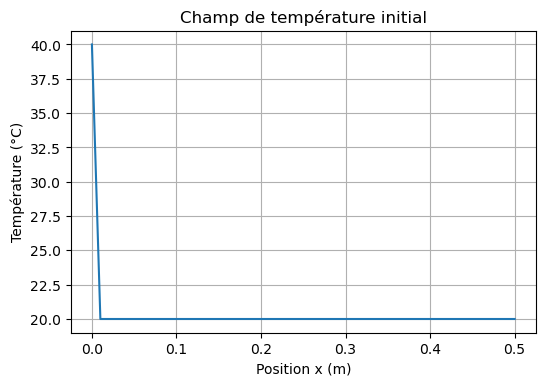

In [13]:
import matplotlib.pyplot as plt
import random
import numpy as np

#Q4) Représentation graphique du champ de température initial
dx=1e-2
dt=1e-2
L=0.5
Deltat=45*60

Nx=int(L/dx)+1
Nt=int(Deltat/dt)+1
x=[j*dx for j in range(Nx)]
t=[i*dt for i in range(Nt)]

T=np.zeros((Nt,Nx))
Tg=40 #on va travailler en °C (on peut aussie le faire en Kelvin)
Td=20

T[0,0]=Tg
for j in range(1,Nx):
    T[0,j]=Td
    
plt.clf()
plt.figure(dpi=100)
plt.plot(x,T[0,:])
plt.grid()
plt.xlabel("Position x (m)")
plt.ylabel("Température (°C)")
plt.title("Champ de température initial")
plt.show()

**Dans cet algorithme Nx représente le nombre d'itérations sur la variable x, Nt sur la variable t, x et t sont des listes qui contiennent les valeurs de x et t pour lesquelles on va représenter la température dans tout l'espace en fonction du temps.**

**Q5) Remplir le tableau T de manière à imposer, à tout instant, les conditions aux limites aux deux extrémités de la barre.**

In [14]:
for i in range (1,Nt): # l'instant initial a déjà été traité
    T[i,0]=Tg
    T[i,-1]=Td

**Q6) En écrivant la formule de Taylor-Young pour f(x+dx)  et f(x-dx), en déduire que :**

Soit :
$$f(x+dx)\simeq f(x)+dxf'(x)+\frac{dx²}{2}f"(x)$$
$$f(x+dx)\simeq f(x)-dxf'(x)+\frac{dx²}{2}f"(x)$$
D'où :
$$f(x+dx)+f(x-dx)\simeq 2f(x)+dx²f"(x)$$
$$f''(x)\simeq\frac{f(x+dx)+f(x-dx)-2f(x)}{dx^2}$$

**Q7) Donnez alors l’expression de $\left(\frac{\partial^2 T}{\partial x^2}\right)_{i,j}$  en fonction de $T[i,j-1],T[i,j+1]$   et $T[i,j]$**

A l'aide de la formule précédente et l'aide de l'énoncé on obtient :
$$\left(\frac{\partial^2 T}{\partial x^2}\right)_{i,j} \simeq \frac{T[i,j+1]+T[i,j-1]-2T[i,j]}{dx^2}$$

**Q8) En déduire que la résolution de l’équation de diffusion thermique dans la barre se ramène au schéma numérique :**
$$ T[i+1,j]=T[i,j]+\frac{D dt}{dx^2} \left( T[i,j+1]+T[i,j-1]-2T[i,j]\right)$$

D'après l'équation de la diffusion : $\frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2}$, il suffit donc de remplacer les deux dérivées :
$$\left(\frac{\partial T}{\partial t}\right)_{i,j} \simeq \frac{T[i+1,j]-T[i,j]}{dt}$$
$$\left(\frac{\partial^2 T}{\partial x^2}\right)_{i,j} \simeq \frac{T[i,j+1]+T[i,j-1]-2T[i,j]}{dx^2}$$
On obtient
$D\frac{T[i,j+1]+T[i,j-1]-2T[i,j]}{dx^2}=\frac{T[i+1,j]-T[i,j]}{dt}$
Ce qui donne le résultat recherché :
$$ T[i+1,j]=T[i,j]+\frac{D dt}{dx^2} \left( T[i,j+1]+T[i,j-1]-2T[i,j]\right)$$

**Q9) Implémenter ce schéma numérique pour réaliser le remplissage du tableau T dans son intégralité.**

In [15]:
D=1e-4

for i in range(0,Nt-1): #on remplit à l'indice i+1
    for j in range(1,Nx-1): #les conditions aux limites sont déjà fixées
        T[i+1,j]=T[i,j]+D*dt/(dx*dx)*(T[i,j+1]+T[i,j-1]-2*T[i,j])

**Q10) Pour les différents instants t={0,1,3,6,9,12,15,30,45}, tracer sur un même graphique l'évolution de la température au sein de la barre. Quand est atteint le régime permanent ? Commenter.**

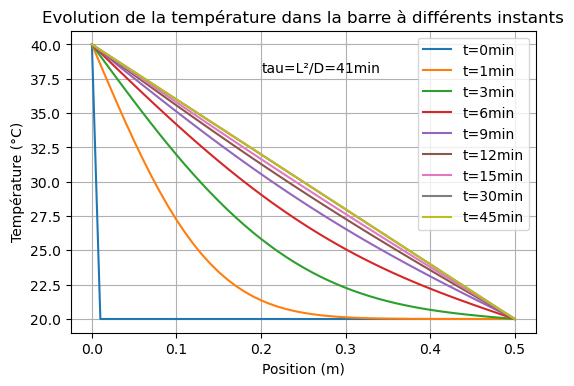

In [16]:
instants_min=[0,1,3,6,9,12,15,30,45] #instants choisis en minutes

plt.close()
plt.figure(dpi=100)
for k in range(len(instants_min)):
    i=int(instants_min[k]*60/dt)
    plt.plot(x,T[i,:],label="t="+str(instants_min[k])+"min")
plt.xlabel("Position (m)")
plt.ylabel("Température (°C)")
plt.title("Evolution de la température dans la barre à différents instants")
plt.legend()
plt.grid()

tau_min=L*L/D*1/60

plt.text(0.201,38,"tau=L²/D="+str(tau_min)[0:2]+"min")
plt.show()

Le régime stationnaire étant représenté par une "droite", on peut considérer que celui-ci est atteint après 30 minutes (ou 45min). On peut conclure que le régimle transitoire laissera place à un régime permanent après 30 minutes.

# III – Puissance volumique interne dans tout le conducteur
**Q11) Donnez l’expression de K en fonction de R, I, S, L, ρ et c.**

L'équation à résoudre est désormais :
$$ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2} + K$$ avec $K=\frac{p_V}{\rho c}$.

Or : $p_V=\frac{RI^2}{SL}$ est la puissance volumique dissipée par effet Joule ($S$ étant la section du barreau), $\rho$ la masse volumique du barreau et $c$ la capacité thermique massique du barreau.

Par conséquent :
$K=\frac{RI²}{\rho c LS}$

**Q12) Pour les mêmes instants, tracer sur un même graphique l'évolution de la température au sein de la barre conductrice. Commenter.**

Cette fois Le schéma numérique associé à cette équation devient :
$$ T[i+1,j]=T[i,j]+dt\times \left(\frac{D}{dx^2} ( T[i,j+1]+T[i,j-1]-2T[i,j]) + K\right)  $$
D'où l'algorithme suivant :

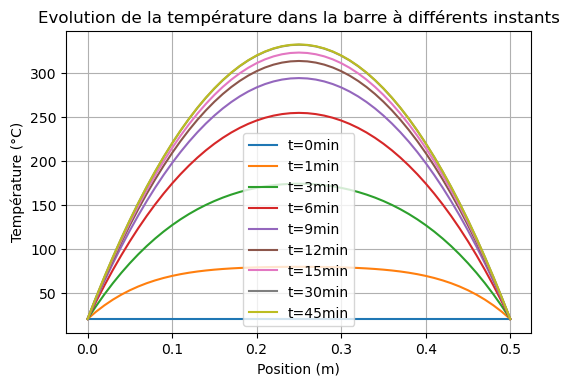

In [17]:
dx=1e-2
dt=1e-2

L=0.5
Deltat=45*60

Nx=int(L/dx)+1
Nt=int(Deltat/dt)+1

x=[j*dx for j in range(Nx)]
t=[i*dt for i in range(Nt)]

T=np.zeros((Nt,Nx))

Tlim=20

#initialisation

T[0,0]=Tlim
for j in range(1,Nx):
    T[0,j]=Tlim
    
#instants ultérieurs

for i in range (1,Nt): # l'instant initial a déjà été traité
    T[i,0]=Tlim
    T[i,-1]=Tlim
    
K=1 #K est choisie arbitrairement de manière à avoir des résultats graphiques adaptés.
D=1e-4

for i in range(0,Nt-1): #on remplit à l'indice i+1
    for j in range(1,Nx-1): #les conditions aux limites sont déjà fixées
        T[i+1,j]=T[i,j]+dt*(D/(dx*dx)*(T[i,j+1]+T[i,j-1]-2*T[i,j])+K) 
        instants_min=[0,1,3,6,9,12,15,30,45] #instants choisis en minutes

plt.close()
plt.figure(dpi=100)
for k in range(len(instants_min)):
    i=int(instants_min[k]*60/dt)
    plt.plot(x,T[i,:],label="t="+str(instants_min[k])+"min")
plt.xlabel("Position (m)")
plt.ylabel("Température (°C)")
plt.title("Evolution de la température dans la barre à différents instants")
plt.legend()
plt.grid()
plt.show()

**Bonus) On peut aussi faire une représentation 3D où sur l'on place x sur l'axe des abscisses, le temps sur celui des ordonnées et la température prend une couleur allant vers le jaune au fur et à mesure que la température augmente.**

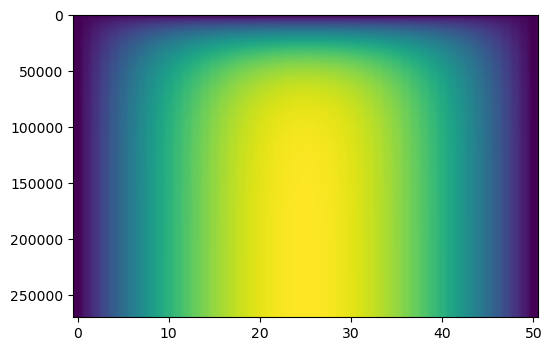

In [21]:
plt.close()
plt.figure(dpi=100)
plt.imshow(T,aspect="auto")
plt.show()